# 10 Armed Bandit Problem

In this notebook, we will create a 10 Armed Bandit Environment and try to solve it using various methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 10
steps = 1000
runs = 2000

In [3]:
def epsilon_greedy(epsilon, optimistic_initilization=0):
  avg_rewards = np.zeros(steps)
  optimal_actions = np.zeros(steps)

  for run in range(runs):
    true = np.random.normal(0, 1, k)
    optimal_action = np.argmax(true)

    Q = np.ones(k) * optimistic_initilization
    N = np.zeros(k)

    for t in range(steps):
      if np.random.rand() < epsilon:
        action =  np.random.randint(k)
      else:
        action = np.argmax(Q)

      reward = np.random.normal(true[action], 1)

      N[action] += 1
      Q[action] += (reward - Q[action]) / N[action]

      avg_rewards[t] += reward
      if action == optimal_action:
        optimal_actions[t] += 1

  avg_rewards /= runs
  optimal_actions /= runs

  return avg_rewards, optimal_actions



### ε-greedy with ε = 0 (pure greedy)

Text(0.5, 1.0, 'ε-greedy')

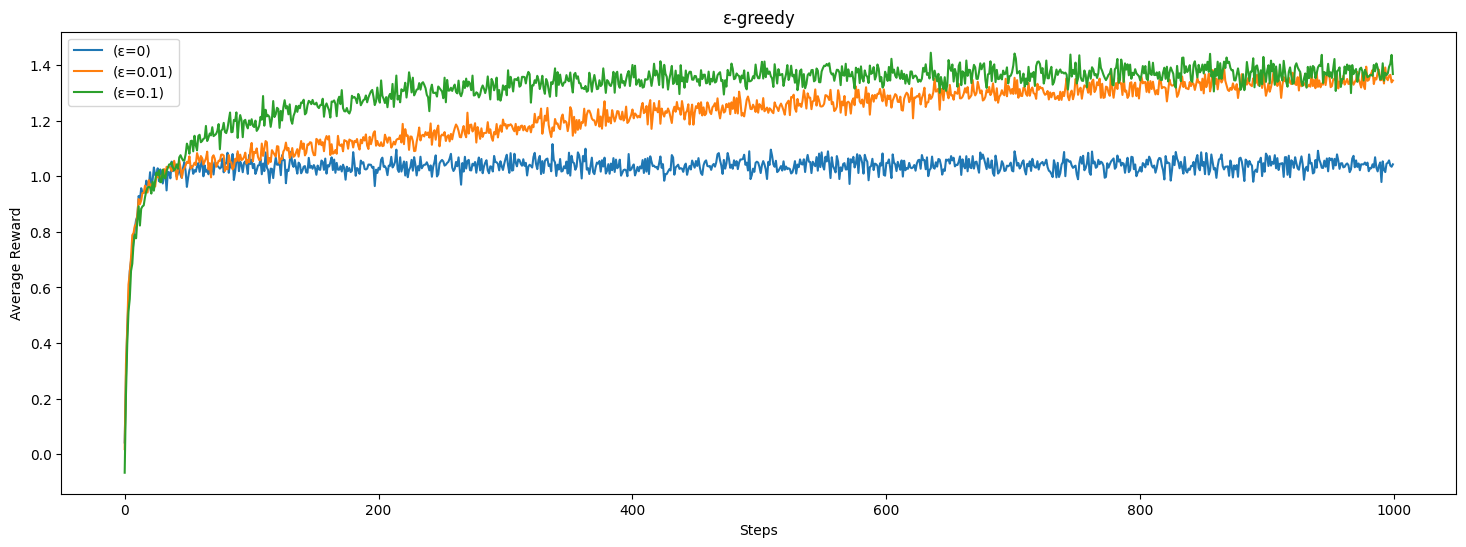

In [4]:
avg_rewards_0, optimal_actions = epsilon_greedy(0)
avg_rewards_1, optimal_actions = epsilon_greedy(0.01)
avg_rewards_2, optimal_actions = epsilon_greedy(0.1)


plt.figure(figsize=(18, 6))
plt.plot(avg_rewards_0, label='(ε=0)')
plt.plot(avg_rewards_1, label='(ε=0.01)')
plt.plot(avg_rewards_2, label='(ε=0.1)')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title(f"ε-greedy")


### Optimistic Initialization (initial values Q1 = 5, ε = 0)

Text(0.5, 1.0, 'Optimistic Initilization Q1=5')

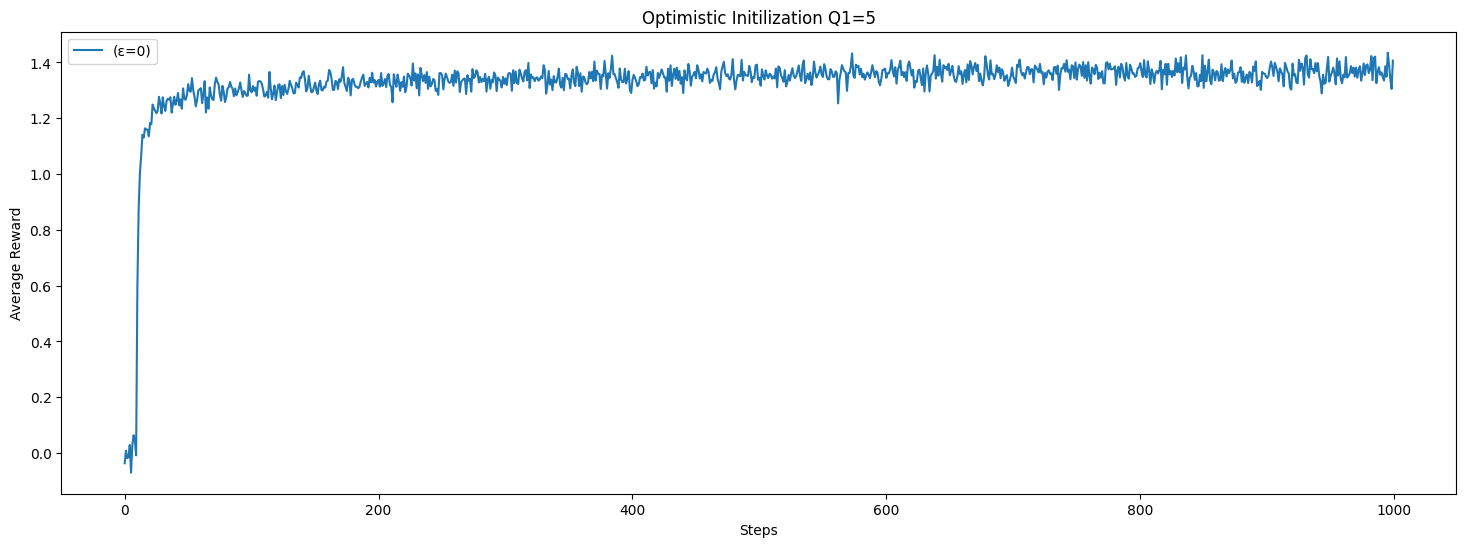

In [5]:
avg_rewards, optimal_actions = epsilon_greedy(0.1, 5)

plt.figure(figsize=(18, 6))
plt.plot(avg_rewards, label='(ε=0)')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Optimistic Initilization Q1=5")

### Upper Confidence Bound (UCB) with c = 2

In [6]:
def upper_confidence_bound(c):
  avg_rewards = np.zeros(steps)
  optimal_actions = np.zeros(steps)

  for run in range(runs):
    true = np.random.normal(0, 1, k)
    optimal_action = np.argmax(true)

    Q = np.zeros(k)
    N = np.zeros(k)

    for t in range(1, steps+1):
      if 0 in N:
        action = np.argmin(N)
      else:
        ucb_values = Q + c * np.sqrt(np.log(t) / N)
        action = np.argmax(ucb_values)

      reward = np.random.normal(true[action], 1)

      N[action] += 1
      Q[action] += (reward - Q[action]) / N[action]

      avg_rewards[t-1] += reward
      if action == optimal_action:
        optimal_actions[t-1] += 1

  avg_rewards /= runs
  optimal_actions /= runs

  return avg_rewards, optimal_actions



Text(0.5, 1.0, 'Upper Confidence Bound')

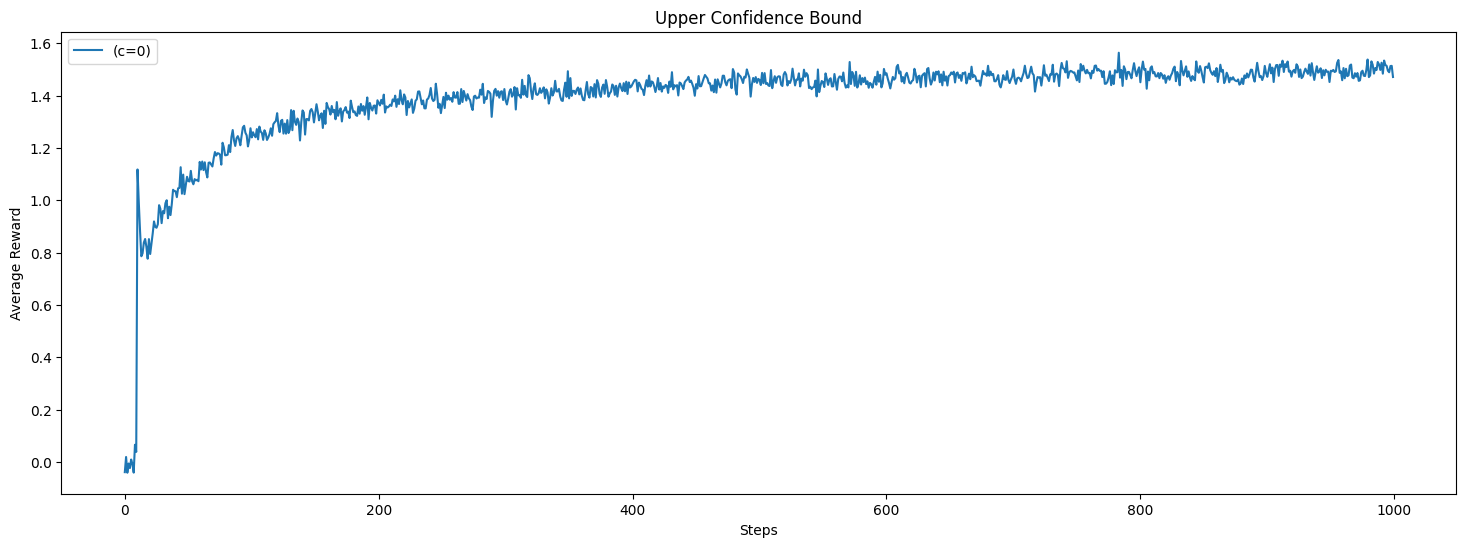

In [7]:
avg_rewards, optimal_actions = upper_confidence_bound(2)

plt.figure(figsize=(18, 6))
plt.plot(avg_rewards, label='(c=0)')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Upper Confidence Bound")

## Conclusion

Epsiloin Greedy methods stabalize at 1 for pure greedy and 1.4 for $\epsilon$ values 0.01 and 0.1. Using an optimistic initialization of $Q_1=5$ gives much better results for pure greedy. Upper confidence bound exceeds all previous algorithms.